# K-means clustering 

In [229]:
import pandas as pd
import numpy as np
import altair as alt

### **Loading Data**

In [230]:
df = pd.read_csv("../../6.3.3_spotify_5000_songs.csv")

In [231]:
df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs
3,Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs
4,Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA


In [232]:
# check for missing values
df.isnull().sum()

name                                                                                                                                                                                 0
artist                                                                                                                                                                               0
danceability                                                                                                                                                                         0
energy                                                                                                                                                                               0
key                                                                                                                                                                                  0
loudness                                                                             

In [233]:
df.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

## Data cleaning

In [234]:
# Remove spaces from all column names
df.columns = df.columns.str.strip()

# Verify the result
print(df.columns)

Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'id', 'html'],
      dtype='object')


### **Step 1: Select and Prepare Numerical Features**
For k-means clustering, we need to select only the numerical features that are relevant for clustering. Here we are removing the qualitative features and also "key" because otherwise the analysis will treat key number as a quantitative feature.

In [235]:
clustering_features = [
       'danceability', 'energy', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature',
]

# Create a dataframe with only these features
X = df[clustering_features].copy()
X = X.dropna(axis=0)

### **Step 2: Normalize the Features**
K-means clustering is sensitive to the scale of features. Since our features have different ranges (e.g., duration_ms is in thousands while danceability is 0-1), we need to standardize them so they all contribute equally to the clustering.

In [236]:
# Calculate min and max for each feature

"""# Calculate mean and standard deviation for each feature
means = X.mean()
stds = X.std()

# Standardize the features (z-score normalization)
# Formula: (value - mean) / std
X_normalized = (X - means) / stds"""

mins = X.min()
maxs = X.max()

# Min-Max normalization
# Formula: (value - min) / (max - min)
X_normalized = ((X - mins) / (maxs - mins))*9+1

# Agglomerative Hierarchical Clustering with Scikit-Learn and Scipy

### **Step 1: Getting the Linkage Matrix**

### **Linkage Methods Explained**
- **Ward**: Minimizes within-cluster variance (most commonly used, only works with euclidean)
- **Complete**: Maximum distance between clusters (farthest points)
- **Average**: Average distance between all pairs of points in clusters
- **Single**: Minimum distance between clusters (nearest points)

In [237]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create linkage matrix using scipy (needed for dendrogram)
# We need to recalculate because sklearn doesn't store the full linkage matrix
linkage_matrix = linkage(
    X_normalized,
    method='ward',  # Same linkage as sklearn
    metric='euclidean'  # Same metric as sklearn
)

# The linkage matrix has shape (n_samples-1, 4) where each row represents a merge
# Columns: [cluster1, cluster2, distance, number_of_original_observations]
linkage_matrix_df = pd.DataFrame(
    linkage_matrix,
    columns=['cluster_1', 'cluster_2', 'distance', 'n_observations']
)

# Display first 10 merges
linkage_matrix_df.head(10)

,cluster_1,cluster_2,distance,n_observations
0,0.0,174.0,0.0,2.0
1,10.0,2494.0,0.0,2.0
2,1680.0,2921.0,0.0,2.0
3,774.0,1732.0,0.0,2.0
4,649.0,1534.0,0.0,2.0
5,763.0,1609.0,0.0,2.0
6,691.0,1695.0,0.0,2.0
7,728.0,2649.0,0.0,2.0
8,68.0,107.0,0.0,2.0
9,912.0,2484.0,0.0,2.0


In [238]:
len(X_normalized), len(linkage_matrix_df)

(5235, 5234)

### **Step 2: Visualizing Dendogram**

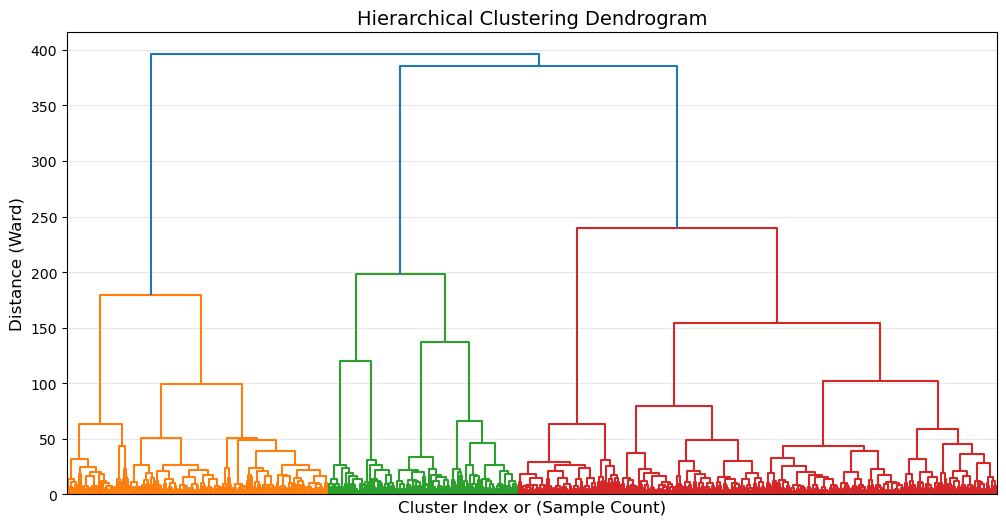

In [239]:
import matplotlib.pyplot as plt

# Create the dendrogram
plt.figure(figsize=(12, 6))
dendrogram_plot = dendrogram(
    linkage_matrix,
    #truncate_mode='lastp',  # Show only the last p merged clusters
    #p=20,  # Number of clusters to show
    #show_leaf_counts=True,  # Show number of samples in each cluster
    #leaf_font_size=10,
    show_contracted=True,
    no_labels=True# Show height of contracted branches
)

plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Cluster Index or (Sample Count)', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.gca();

### **Step 3: Cutting the dendrogram**

In [240]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram at height 160
# This assigns cluster labels based on the specified height
clusters_at_height_50 = fcluster(
    linkage_matrix,
    t=160,  # The threshold/height where to cut
    criterion='distance'  # Cut based on distance (height)
)

# Create a dataframe with the cluster assignments
X_clusters_height_50 = X_normalized.copy()
X_clusters_height_50['cluster'] = clusters_at_height_50

# Display first 10 rows
X_clusters_height_50.head(10)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,7.124095,3.3310,7.875077,1.0,1.691176,7.271084,1.000536,9.890578,3.795939,5.642198,1.531605,8.2,3
1,7.905895,4.5910,7.947703,10.0,1.339216,2.960843,1.000017,1.975684,7.331980,6.258895,1.378523,8.2,6
2,8.920372,7.5700,8.182159,10.0,4.401961,5.093373,1.000579,2.130699,9.269036,4.940754,1.284313,8.2,6
3,7.561531,1.4518,7.145300,10.0,1.461765,8.942771,1.000370,4.519757,5.787817,5.491883,1.365105,8.2,4
4,7.058945,2.0710,6.897053,10.0,1.372549,9.277108,1.003134,1.948328,4.673096,6.086541,1.573160,8.2,4
5,5.337125,2.3140,7.235532,10.0,1.636275,9.412651,2.407107,1.975684,4.864975,7.009463,1.515366,8.2,4
6,7.282316,2.8630,7.775456,1.0,1.534314,9.701807,4.782741,2.021277,7.249746,4.933731,1.267469,8.2,3
7,5.690796,7.5970,8.230283,10.0,4.813725,7.289157,1.000513,7.136778,9.095431,5.061335,1.658996,8.2,6
8,7.459152,5.9140,8.122885,10.0,1.392157,4.596386,1.694416,2.395137,6.856853,8.151213,1.407452,8.2,6
9,7.273009,8.7760,8.633612,10.0,1.374510,6.792169,4.271066,2.267477,5.897462,5.205594,1.352986,8.2,6


### **4. Running PCA**

In [241]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_normalized)

# Create a DataFrame with PCA results
X_pca_df = pd.DataFrame(
    X_pca,
    columns=['PC1', 'PC2']
)

# Display variance explained
variance_explained = pca.explained_variance_ratio_
print(f"""
**PCA Results:**
- PC1 explains {variance_explained[0]:.2%} of variance
- PC2 explains {variance_explained[1]:.2%} of variance
- Total variance explained: {variance_explained.sum():.2%}
""")


**PCA Results:**
- PC1 explains 31.61% of variance
- PC2 explains 29.26% of variance
- Total variance explained: 60.86%



### **Step 5: Visualize with PCA**

In [242]:
# Visualize the clusters in PCA space
# Create a DataFrame for plotting
import altair as alt
alt.data_transformers.enable("vegafusion")


plot_df_height_50 = X_pca_df.copy()
plot_df_height_50['cluster'] = clusters_at_height_50.astype(str)

chart_height_50 = alt.Chart(plot_df_height_50).mark_circle(size=30, opacity=0.6).encode(
    x=alt.X('PC1:Q', title=f'PC1 ({variance_explained[0]:.1%} variance)'),
    y=alt.Y('PC2:Q', title=f'PC2 ({variance_explained[1]:.1%} variance)'),
    color=alt.Color('cluster:N', title='Cluster', scale=alt.Scale(scheme='category10')),
    tooltip=['PC1', 'PC2', 'cluster']
).properties(
    title='Hierarchical Clustering - Cut at Height 200',
    width=600,
    height=500
)

chart_height_50

ImportError: Missing optional dependency 'pyarrow'.  Use pip or conda to install pyarrow.

alt.Chart(...)

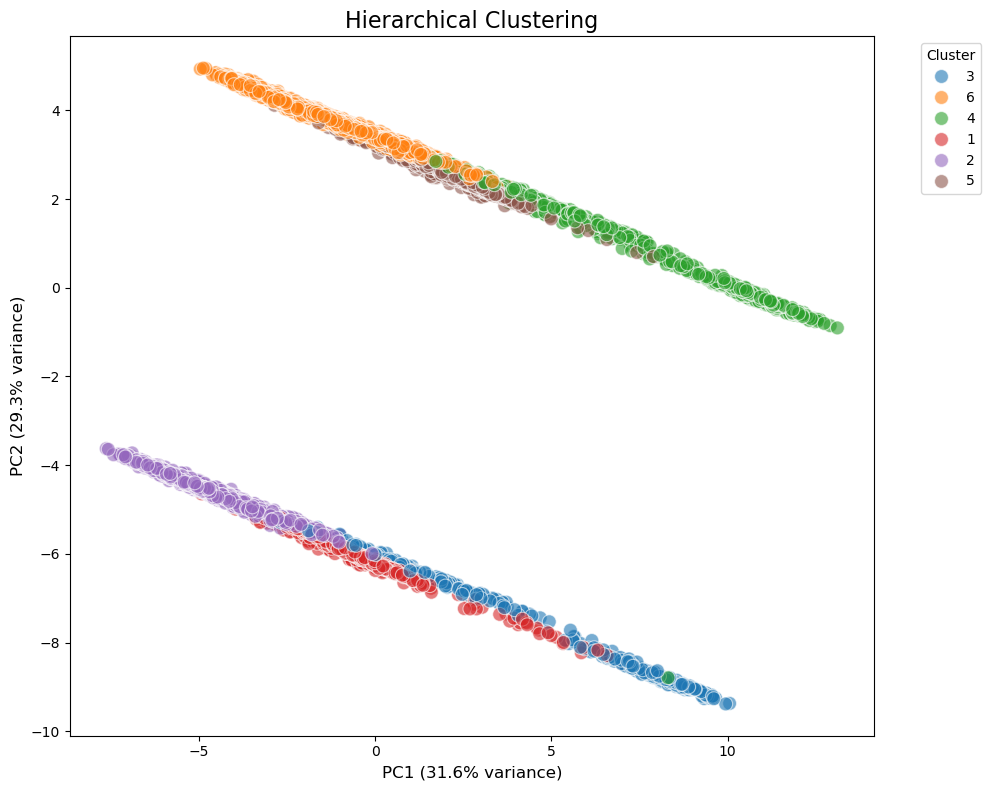

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

plot_df_height_50 = X_pca_df.copy()
plot_df_height_50['cluster'] = clusters_at_height_50.astype(str)

plt.figure(figsize=(10, 8))

sns.scatterplot(
    data=plot_df_height_50,
    x='PC1',
    y='PC2',
    hue='cluster',           # Colors by cluster
    palette='tab10',         # Similar colors to your previous chart
    s=100,                   # Size of dots (equivalent to size=30 in Altair)
    alpha=0.6                # Transparency
)

plt.title('Hierarchical Clustering', fontsize=16)
plt.xlabel(f'PC1 ({variance_explained[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({variance_explained[1]:.1%} variance)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [244]:
# Join dataframes to add cluster labels to original data
df_with_clusters = df.join(
    X_clusters_height_50[['cluster']],
    how='inner'
)

df_with_clusters.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,3
1,Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,6
2,"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,6
3,Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,4
4,Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,4


### Step 6. Visualize PCA with feature names

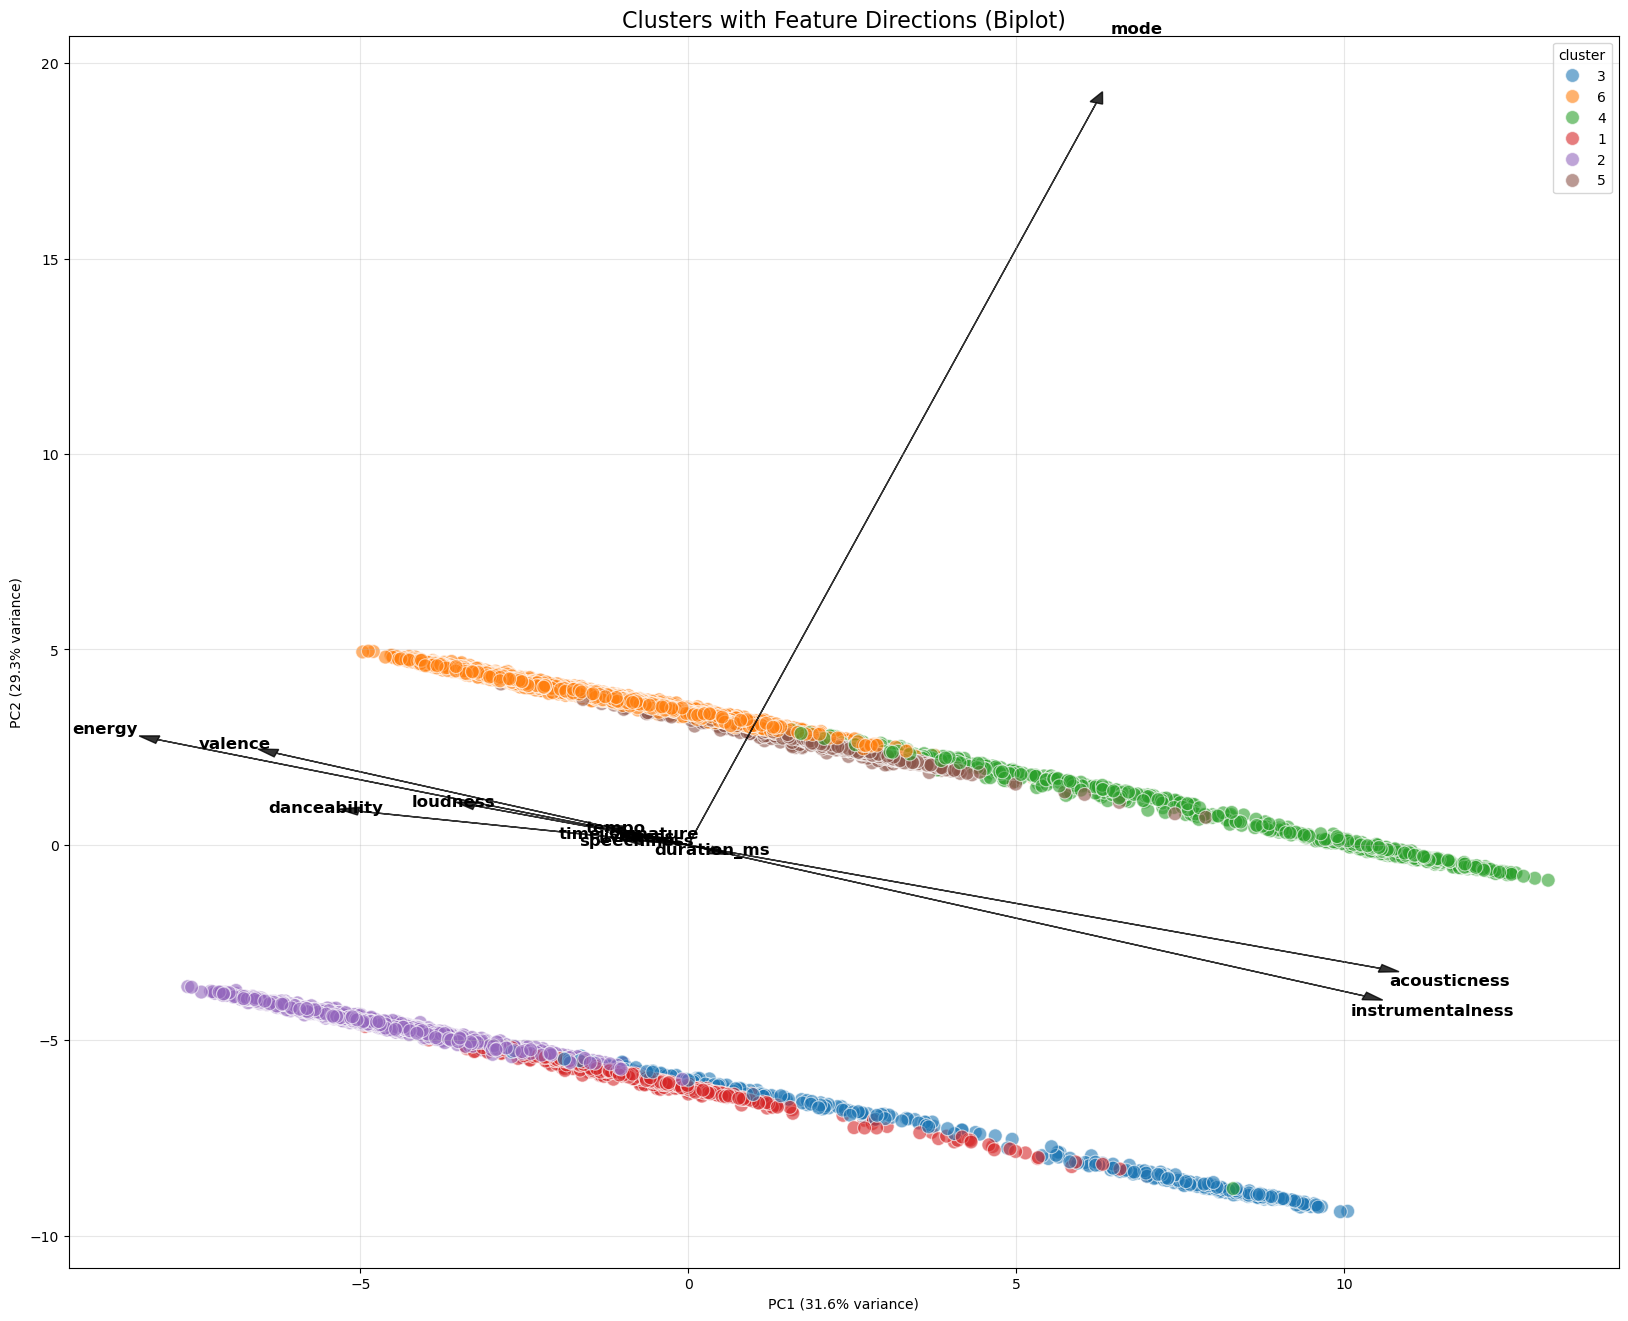

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 16))
sns.scatterplot(
    data=plot_df_height_50,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    alpha=0.6,
    s=100
)

# Extract the components (The "Directions")
# pca_components_ is a matrix where rows are PCs and cols are original features
loadings = pca.components_.T  # Transpose so rows are features

# Scaling Factor
scale_factor = 20

# Draw the arrows
for i, feature in enumerate(clustering_features):
    x_dir = loadings[i, 0] * scale_factor
    y_dir = loadings[i, 1] * scale_factor

    plt.arrow(0, 0, x_dir, y_dir, color='black', alpha=0.8, head_width=0.2)

    plt.text(x_dir * 1.1, y_dir * 1.1, feature, color='black', ha='center', va='center', fontsize=12, fontweight='bold')

plt.title('Clusters with Feature Directions (Biplot)', fontsize=16)
plt.xlabel(f'PC1 ({variance_explained[0]:.1%} variance)')
plt.ylabel(f'PC2 ({variance_explained[1]:.1%} variance)')
plt.grid(True, alpha=0.3)
plt.show()

Plot the sample space without the 'mode' value to see how other variables correlate

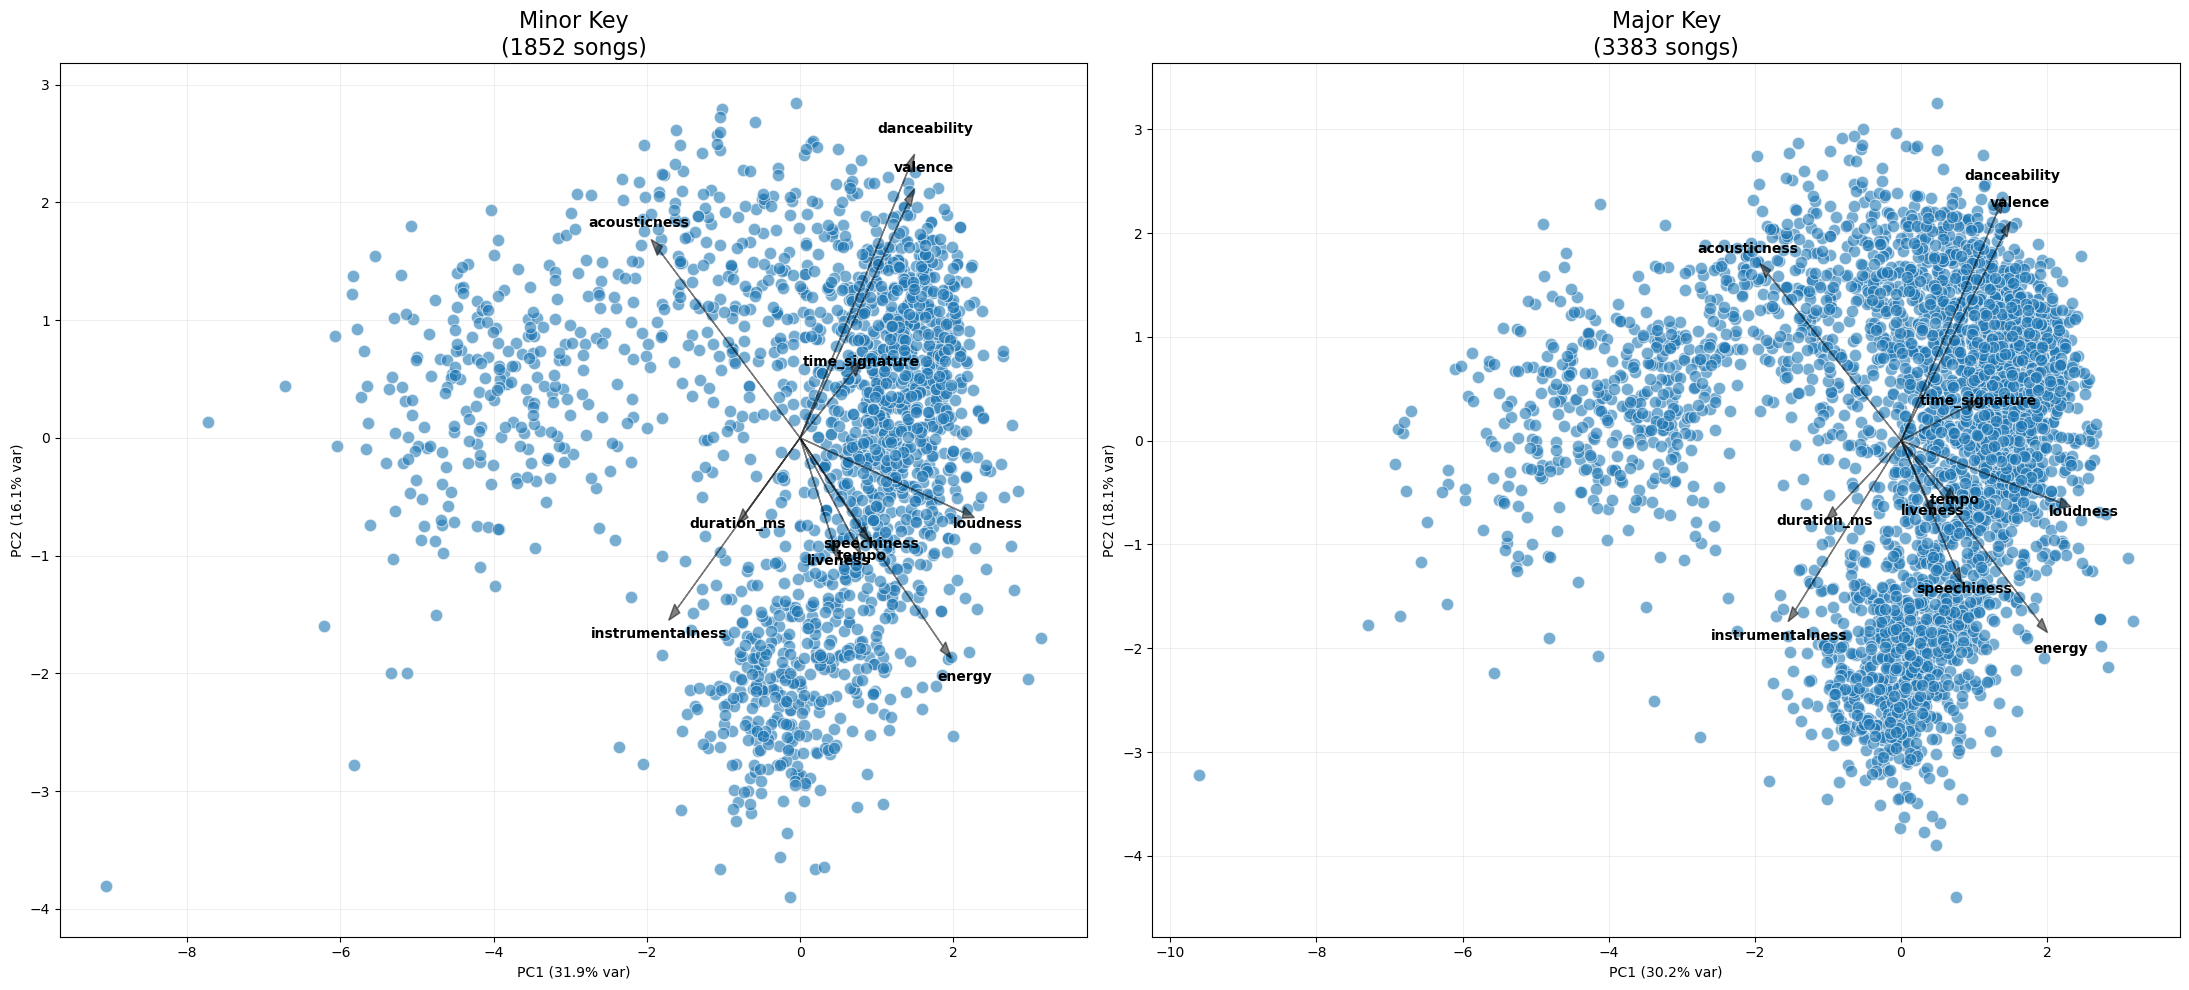

In [248]:
df_minor = df[df['mode'] == 0].copy()
df_major = df[df['mode'] == 1].copy()
subframes = [df_minor, df_major]
mode_names = ['Minor Key', 'Major Key']

# Only numeric features (no text)
features_to_use = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'duration_ms', 'time_signature'
]

fig, axes = plt.subplots(1, 2, figsize=(22, 10))

# 2. THE LOOP
for i, current_df in enumerate(subframes):
    ax = axes[i]
    
    # A. Scale
    scaler = StandardScaler()
    X_subset = scaler.fit_transform(current_df[features_to_use])
    
    # B. PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_subset)
    
    # C. Plotting (One Blue Color)
    sns.scatterplot(
        x=X_pca[:, 0], 
        y=X_pca[:, 1], 
        color='tab:blue',  # <--- All points are blue
        ax=ax,
        alpha=0.6,
        s=80
    )
    
    # D. Biplot Arrows
    loadings = pca.components_.T
    scale_factor = 4.5 
    
    for j, feature in enumerate(features_to_use):
        x_dir = loadings[j, 0] * scale_factor
        y_dir = loadings[j, 1] * scale_factor
        
        ax.arrow(0, 0, x_dir, y_dir, color='black', alpha=0.5, head_width=0.1)
        ax.text(x_dir * 1.15, y_dir * 1.15, feature, 
                color='black', ha='center', va='center', fontsize=10, fontweight='bold')

    # E. Titles
    ax.set_title(f'{mode_names[i]}\n({len(current_df)} songs)', fontsize=16)
    ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} var)')
    ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} var)')
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

In [250]:
all_clusters = sorted(df_with_clusters['cluster'].unique())
for c in all_clusters:
    count = len(df_with_clusters[df_with_clusters['cluster'] == c])
    print(f"Cluster {c}: {count}")

Cluster 1: 355
Cluster 2: 1120
Cluster 3: 376
Cluster 4: 691
Cluster 5: 577
Cluster 6: 2116


### **Step 7: Create Spotify Playlists**

In [249]:
# Get sample songs of each cluster for playlist creation
sample_songs_per_cluster = df_with_clusters.groupby('cluster').apply(
    lambda x: x.sample(n=10, random_state=42)  # Sample 5 songs per cluster
).reset_index(drop=True)

/var/folders/lc/rwbnk4114w78tcfk73z_364m0000gn/T/ipykernel_5626/864742372.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_songs_per_cluster = df_with_clusters.groupby('cluster').apply(


In [251]:
sample_cluster_1 = sample_songs_per_cluster[sample_songs_per_cluster['cluster'] == 1]
display(sample_cluster_1)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
0,Open the Abscess,Exhumed,0.234,0.935,1,-6.505,0,0.1250,0.000003,0.780,0.2360,0.2740,120.148,198133,4,3UhYJQKJAeFAQZw7HUp6W7,https://open.spotify.com/track/3UhYJQKJAeFAQZw7HUp6W7,1
1,Tell Me a Bedtime Story,Herbie Hancock,0.398,0.527,4,-16.591,0,0.0297,0.713000,0.934,0.1190,0.3530,118.504,301867,4,6eimz6jvlZaPwtflDWCTa0,https://open.spotify.com/track/6eimz6jvlZaPwtflDWCTa0,1
2,Slit Your Guts,Cryptopsy,0.249,0.977,10,-3.447,0,0.2080,0.000005,0.880,0.3550,0.3080,108.993,241600,3,0Tl3FQ3VoxrbaAOIshwsfM,https://open.spotify.com/track/0Tl3FQ3VoxrbaAOIshwsfM,1
3,Scars Of The Crucifix,Deicide,0.268,0.993,10,-4.048,0,0.0874,0.000945,0.873,0.0937,0.1110,97.991,188293,4,3ztZNULykf6ijrqJRcfZAJ,https://open.spotify.com/track/3ztZNULykf6ijrqJRcfZAJ,1
4,Deep Down Low,Valentino Khan,0.794,0.896,5,-1.514,0,0.0677,0.003710,0.615,0.0876,0.5000,125.999,190476,4,46rZgRYU1H5Xnv0n75OGis,https://open.spotify.com/track/46rZgRYU1H5Xnv0n75OGis,1
5,Holocaust Divinity,Insatanity,0.233,0.737,10,-11.750,0,0.1810,0.000003,0.603,0.1130,0.2790,186.837,308402,4,0Rv3jVNT6QwPLlrb0B7JNx,https://open.spotify.com/track/0Rv3jVNT6QwPLlrb0B7JNx,1
6,Going to Georgia,The Mountain Goats,0.569,0.440,5,-10.598,0,0.0341,0.579000,0.725,0.1150,0.3260,118.382,135693,4,1ey9ub4AISvEmjM7tkoBh0,https://open.spotify.com/track/1ey9ub4AISvEmjM7tkoBh0,1
7,Get Low,Dillon Francis,0.674,0.932,11,-4.424,0,0.0859,0.028200,0.710,0.6840,0.7280,101.033,212773,4,3oZoXyU0SkDldgS7AcN4y4,https://open.spotify.com/track/3oZoXyU0SkDldgS7AcN4y4,1
8,Wings,Vader,0.236,0.980,10,-5.004,0,0.1870,0.000001,0.918,0.1570,0.0539,125.169,190747,4,1aXslcXXFxPB9nDlya7Ge0,https://open.spotify.com/track/1aXslcXXFxPB9nDlya7Ge0,1
9,Turning Back - remastered 2003,Grave,0.265,0.823,3,-5.918,0,0.1090,0.000003,0.777,0.1150,0.5110,136.107,271547,4,3D4GDEzfaarJ1BLOc5HUrx,https://open.spotify.com/track/3D4GDEzfaarJ1BLOc5HUrx,1


In [252]:
sample_cluster_2 = sample_songs_per_cluster[sample_songs_per_cluster['cluster'] == 2]
display(sample_cluster_2)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
10,I Want It That Way,Backstreet Boys,0.689,0.702,6,-5.642,0,0.0261,0.216000,0.000000,0.1590,0.4840,99.031,213600,4,6e40mgJiCid5HRAGrbpGA6,https://open.spotify.com/track/6e40mgJiCid5HRAGrbpGA6,2
11,"I Can’t Get Enough (benny blanco, Selena Gomez, J Balvin, Tainy)",benny blanco,0.541,0.468,10,-4.039,0,0.3620,0.404000,0.000004,0.3580,0.6900,95.266,158027,4,1WSGTYKLEpKfNQYYW5Oymt,https://open.spotify.com/track/1WSGTYKLEpKfNQYYW5Oymt,2
12,"Irgendwie, irgendwo, irgendwann - Live",Jan Delay,0.567,0.742,8,-5.858,0,0.0432,0.079900,0.000000,0.9590,0.7450,78.851,389787,4,0Iq9uA5F1zaae9Xz5F5tph,https://open.spotify.com/track/0Iq9uA5F1zaae9Xz5F5tph,2
13,110,Capital Bra,0.480,0.749,1,-5.057,0,0.4320,0.533000,0.000000,0.0997,0.4190,179.056,194534,4,5sdQ7VUx6GOfsRoSxnK1YG,https://open.spotify.com/track/5sdQ7VUx6GOfsRoSxnK1YG,2
14,Sparks (Turn Off Your Mind) - Radio Edit,Fedde Le Grand,0.490,0.960,7,-2.534,0,0.1440,0.003650,0.019300,0.8440,0.3330,128.048,185625,4,12C80VvfoJc2mQ75HZUL0X,https://open.spotify.com/track/12C80VvfoJc2mQ75HZUL0X,2
15,Razor Divine,Deranged,0.174,0.995,11,-4.681,0,0.2320,0.000002,0.083000,0.6650,0.0392,124.894,200080,4,3g7FF4AAj3oETMMWv6taX0,https://open.spotify.com/track/3g7FF4AAj3oETMMWv6taX0,2
16,D.A.N.C.E,Justice,0.613,0.962,6,-5.070,0,0.2780,0.034000,0.000000,0.8240,0.4960,113.015,242267,4,33yAEqzKXexYM3WlOYtTfQ,https://open.spotify.com/track/33yAEqzKXexYM3WlOYtTfQ,2
17,I'm Outta Love - Radio Edit,Anastacia,0.761,0.716,10,-5.800,0,0.0560,0.396000,0.000000,0.0771,0.6490,119.410,245400,4,2CaseM6BKvQpi6blK8nbxC,https://open.spotify.com/track/2CaseM6BKvQpi6blK8nbxC,2
18,Five More Hours - Deorro x Chris Brown,Deorro,0.704,0.802,5,-6.175,0,0.2170,0.035500,0.000000,0.6820,0.5260,127.973,212640,4,6f1QFKG6GSBKdh7zfbj9rc,https://open.spotify.com/track/6f1QFKG6GSBKdh7zfbj9rc,2
19,"Whenever, Wherever",Shakira,0.794,0.832,1,-4.862,0,0.0407,0.237000,0.000011,0.2030,0.8710,107.657,196160,4,2lnzGkdtDj5mtlcOW2yRtG,https://open.spotify.com/track/2lnzGkdtDj5mtlcOW2yRtG,2


In [253]:
sample_cluster_3 = sample_songs_per_cluster[sample_songs_per_cluster['cluster'] == 3]
display(sample_cluster_3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
20,When Sunny Gets Blue,McCoy Tyner,0.427,0.11400,2,-22.546,0,0.0509,0.843,0.863000,0.0966,0.1140,60.484,282320,4,1J9iVCaEriyoMXpj2XszhU,https://open.spotify.com/track/1J9iVCaEriyoMXpj2XszhU,3
21,"Symphony No.1 in C minor, Op.68: 1. Un poco sostenuto - Allegro - Meno allegro",Johannes Brahms,0.257,0.12900,0,-16.010,0,0.0351,0.951,0.904000,0.1590,0.0519,103.179,926660,4,6jWrXbhQcKEN7Zhzh84iTL,https://open.spotify.com/track/6jWrXbhQcKEN7Zhzh84iTL,3
22,My Funny Valentine,Chet Baker,0.438,0.00756,0,-26.440,0,0.0382,0.941,0.006430,0.1090,0.2770,133.320,141133,4,4l9hml2UCnxoNI3yCdL1BW,https://open.spotify.com/track/4l9hml2UCnxoNI3yCdL1BW,3
23,"Trois Gymnopédies: lll. ""Lent et grave""",Erik Satie,0.551,0.00775,9,-39.695,0,0.1380,0.996,0.944000,0.0654,0.3860,77.979,146933,3,4oOIflViMVttUskTUOSC3Y,https://open.spotify.com/track/4oOIflViMVttUskTUOSC3Y,3
24,A Calling,Goldbæk,0.418,0.02580,8,-20.947,0,0.0500,0.983,0.870000,0.1080,0.2510,133.897,221940,4,3EpRH47Zg4w2kykYVSLzd1,https://open.spotify.com/track/3EpRH47Zg4w2kykYVSLzd1,3
25,Moondance - 2013 Remaster,Van Morrison,0.606,0.28200,9,-12.207,0,0.0339,0.501,0.000008,0.1520,0.5630,67.409,274040,4,683b4ikwa62JevCjwrmfg6,https://open.spotify.com/track/683b4ikwa62JevCjwrmfg6,3
26,Exhibit A,Goldbæk,0.288,0.15300,1,-21.162,0,0.0334,0.931,0.859000,0.1080,0.0497,176.248,198031,4,7q0pjhvwTCpFwhAbhuOLeL,https://open.spotify.com/track/7q0pjhvwTCpFwhAbhuOLeL,3
27,California Dreamin' - Remastered,Bobby Womack,0.475,0.32800,6,-15.263,0,0.0307,0.778,0.008500,0.0729,0.6780,112.117,200667,4,3ChKtS6fpy2XrLnT60meKq,https://open.spotify.com/track/3ChKtS6fpy2XrLnT60meKq,3
28,You Send Me,Sam Cooke,0.538,0.22600,4,-13.817,0,0.0288,0.945,0.000000,0.1250,0.5530,96.951,163560,4,7fPOOCejoBt3dIm6UcEdm8,https://open.spotify.com/track/7fPOOCejoBt3dIm6UcEdm8,3
29,"Symphony No.4 In E Minor, Op.98: 1. Allegro non troppo",Johannes Brahms,0.165,0.10600,4,-17.802,0,0.0386,0.974,0.912000,0.3780,0.0692,73.911,776000,4,3nSB6SGVgQQsZoWBCmlLj9,https://open.spotify.com/track/3nSB6SGVgQQsZoWBCmlLj9,3


In [254]:
sample_cluster_4 = sample_songs_per_cluster[sample_songs_per_cluster['cluster'] == 4]
display(sample_cluster_4)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
30,"Étude No. 2 in A-Flat Major from ""Trois Nouvelles Études""",Frédéric Chopin,0.2970,0.060000,8,-26.920,1,0.0357,0.994,0.903,0.1050,0.0641,113.755,116080,1,1P5LXjpV8a5GsnMtvqaZ88,https://open.spotify.com/track/1P5LXjpV8a5GsnMtvqaZ88,4
31,EXPO,Magnus Lindberg,0.0683,0.207000,7,-21.828,1,0.0489,0.887,0.928,0.7620,0.0379,58.339,607467,4,197V1pGvVRrfYNPwtskcHt,https://open.spotify.com/track/197V1pGvVRrfYNPwtskcHt,4
32,Prelude No. 1 in C Major,Dmitri Shostakovich,0.4330,0.003560,0,-34.764,1,0.0724,0.995,0.924,0.0613,0.0394,161.762,157333,4,3ryffcVzNUYVPSsva3gLlm,https://open.spotify.com/track/3ryffcVzNUYVPSsva3gLlm,4
33,Jasper's Way,Tony Calabro,0.4680,0.123000,7,-21.296,1,0.0826,0.973,0.824,0.1110,0.1690,184.169,150246,4,4SFUB1DbDuR4pXfeuZOL08,https://open.spotify.com/track/4SFUB1DbDuR4pXfeuZOL08,4
34,Another Hike,Hauschka,0.5080,0.324000,0,-16.532,1,0.0393,0.988,0.854,0.1190,0.1300,122.684,217622,4,6YsT9qiuma7Va2plkkjSw1,https://open.spotify.com/track/6YsT9qiuma7Va2plkkjSw1,4
35,"3 Gymnopédies: No. 1, Lent et douloureux",Erik Satie,0.4680,0.001830,7,-32.776,1,0.0584,0.995,0.951,0.0852,0.1450,75.792,210800,3,5xwizYZCXpF45lBvzBPB9R,https://open.spotify.com/track/5xwizYZCXpF45lBvzBPB9R,4
36,A Thousand Miles,Henry Smith,0.3150,0.152000,11,-15.952,1,0.0566,0.987,0.936,0.1430,0.2340,81.178,167184,4,0bugfVBn7nP2jIbjs1Fl7Y,https://open.spotify.com/track/0bugfVBn7nP2jIbjs1Fl7Y,4
37,I Don't Want to Talk About It - 2008 Remaster,Rod Stewart,0.4720,0.373000,3,-12.980,1,0.0262,0.872,0.206,0.1470,0.4590,135.193,288267,4,2JWKzkQbYsNzx019WyGzaH,https://open.spotify.com/track/2JWKzkQbYsNzx019WyGzaH,4
38,"Handel Sarabande Variation (Arr. for Piano from Sarabande, HWV 437)",George Frideric Handel,0.4400,0.000791,1,-41.916,1,0.0551,0.995,0.888,0.1300,0.4820,75.233,88002,4,3feQhB0v39umXvnaK1BSkK,https://open.spotify.com/track/3feQhB0v39umXvnaK1BSkK,4
39,Forever Song,Alexis Ffrench,0.1680,0.146000,2,-16.778,1,0.0407,0.986,0.902,0.1020,0.0761,79.317,208027,4,4KNOegRy2oSJQJEdl3Ohj8,https://open.spotify.com/track/4KNOegRy2oSJQJEdl3Ohj8,4


In [255]:
sample_cluster_5 = sample_songs_per_cluster[sample_songs_per_cluster['cluster'] == 5]
display(sample_cluster_5)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
40,The Nine - Remastered,Bad Company UK,0.615,0.630,7,-6.605,1,0.0783,0.025500,0.864,0.3330,0.1190,174.014,426449,4,6riqU6hSr9SLMkYLyo5Oae,https://open.spotify.com/track/6riqU6hSr9SLMkYLyo5Oae,5
41,Left Behind,Desultory,0.259,0.895,11,-7.286,1,0.1140,0.000022,0.436,0.2460,0.4300,119.241,190973,4,7AVkqWyhZTDMCSY2SFqK6J,https://open.spotify.com/track/7AVkqWyhZTDMCSY2SFqK6J,5
42,Putrid Intercourse,Convulse,0.203,0.945,7,-5.805,1,0.0798,0.000132,0.867,0.4280,0.2720,93.931,208413,4,1GZE1Vyy0BqHShhA3xCqZw,https://open.spotify.com/track/1GZE1Vyy0BqHShhA3xCqZw,5
43,Devotion (feat. Tony Scott) - Extended Instrumental,Bingo Players,0.864,0.677,1,-7.558,1,0.0707,0.001880,0.826,0.4820,0.3180,126.024,418008,4,4iSA8yUf946Qf8LImGoZka,https://open.spotify.com/track/4iSA8yUf946Qf8LImGoZka,5
44,Games Of Humilation - remastered,Pungent Stench,0.223,0.816,6,-3.739,1,0.0508,0.000123,0.800,0.3100,0.3410,109.680,307013,4,0hjWNzk5EuTURE5vj9qYzO,https://open.spotify.com/track/0hjWNzk5EuTURE5vj9qYzO,5
45,Seeds of the Suffering,Suffocation,0.333,0.939,7,-7.642,1,0.1690,0.000045,0.918,0.1690,0.3940,118.884,352760,4,0mUPCLUjXi0p69Ipepe98p,https://open.spotify.com/track/0mUPCLUjXi0p69Ipepe98p,5
46,Lashed To the Slave Stick,Nile,0.312,0.903,0,-6.371,1,0.0453,0.000002,0.902,0.0698,0.2060,187.102,258093,4,62hzJcOwMg68h6wBimZALA,https://open.spotify.com/track/62hzJcOwMg68h6wBimZALA,5
47,Mai,Vàlius,0.565,0.952,4,-6.367,1,0.0493,0.040500,0.483,0.1530,0.7920,154.992,198415,4,4kNWml50ULJY4EtGpQlwuv,https://open.spotify.com/track/4kNWml50ULJY4EtGpQlwuv,5
48,Gecko - Radio Edit,Oliver Heldens,0.791,0.827,0,-6.647,1,0.0608,0.105000,0.906,0.2270,0.4780,125.039,166100,4,6ThRa5TNbu5qzHsRV2dH0A,https://open.spotify.com/track/6ThRa5TNbu5qzHsRV2dH0A,5
49,Scrolls Of The Megilloth,Mortification,0.237,0.959,3,-8.750,1,0.3930,0.000273,0.749,0.0743,0.0458,97.935,268933,4,1coGwiXAgjVotO6akhpXDb,https://open.spotify.com/track/1coGwiXAgjVotO6akhpXDb,5


In [256]:
sample_cluster_6 = sample_songs_per_cluster[sample_songs_per_cluster['cluster'] == 6]
display(sample_cluster_6)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
50,Criminal Ecstasy,Blackthorn,0.271,0.830,7,-11.125,1,0.0678,0.000084,0.070500,0.3280,0.1840,148.242,390627,4,06kSpBFjDertRkLyBAciQ3,https://open.spotify.com/track/06kSpBFjDertRkLyBAciQ3,6
51,Leprosy,Death,0.222,0.985,10,-5.484,1,0.1360,0.000002,0.109000,0.0592,0.0984,108.994,380440,3,6QzjXmQ1mHNYHrwNurA9vJ,https://open.spotify.com/track/6QzjXmQ1mHNYHrwNurA9vJ,6
52,Super Bass,Nicki Minaj,0.720,0.861,11,-4.339,1,0.2090,0.269000,0.000005,0.6010,0.6690,126.991,200013,4,0iYebKFUSfF72fUu2OW6ZT,https://open.spotify.com/track/0iYebKFUSfF72fUu2OW6ZT,6
53,Why Do Fools Fall In Love,Frankie Lymon & The Teenagers,0.430,0.558,1,-6.549,1,0.0844,0.534000,0.000507,0.0914,0.7790,172.756,140827,4,6XAcmxPbCfMzLBvjBd2G0H,https://open.spotify.com/track/6XAcmxPbCfMzLBvjBd2G0H,6
54,Edible Autopsy,Cannibal Corpse,0.325,0.985,4,-8.115,1,0.1510,0.000107,0.000249,0.1120,0.0917,105.487,270560,4,05VaxA9tfxOmgWoc76yJ9q,https://open.spotify.com/track/05VaxA9tfxOmgWoc76yJ9q,6
55,Splish Splash,Bobby Darin,0.645,0.943,0,-1.526,1,0.0393,0.385000,0.000000,0.3700,0.9650,147.768,131720,4,40fD7ct05FvQHLdQTgJelG,https://open.spotify.com/track/40fD7ct05FvQHLdQTgJelG,6
56,Hip-Hop,Dead Prez,0.583,0.543,4,-14.299,1,0.4030,0.000642,0.003290,0.1110,0.1920,78.221,214173,4,7GZponFcuF76akiRDuaoaj,https://open.spotify.com/track/7GZponFcuF76akiRDuaoaj,6
57,"The Heat Is On - From ""Beverly Hills Cop"" Soundtrack",Glenn Frey,0.622,0.865,7,-6.369,1,0.0531,0.016700,0.000023,0.0692,0.8700,149.706,227800,4,0PXw9NKvolWTo7U9JkNzmc,https://open.spotify.com/track/0PXw9NKvolWTo7U9JkNzmc,6
58,Pon de Replay,Rihanna,0.779,0.640,7,-8.415,1,0.1590,0.000155,0.000770,0.1010,0.4980,99.019,246960,4,4TsmezEQVSZNNPv5RJ65Ov,https://open.spotify.com/track/4TsmezEQVSZNNPv5RJ65Ov,6
59,Blue Train - Remastered 2003,John Coltrane,0.506,0.493,8,-7.759,1,0.0427,0.798000,0.003550,0.3070,0.5840,134.770,644013,4,6ZgaUtMlUzUf7SqbUUnfbu,https://open.spotify.com/track/6ZgaUtMlUzUf7SqbUUnfbu,6
